<a href="https://colab.research.google.com/github/mirpouya/TensorFlow-Tutorial/blob/main/Linear_Regression_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf  # model
import pandas as pd  # data preparation
import seaborn as sns  # visualization

<h2> <b> Data Preparation </b> </h2>

In [27]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [28]:
data.shape

(1000, 12)

In [29]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

<h3> Convert data to tensors </h3>

In [30]:
tensor_data = tf.constant(data)

In [31]:

tensor_data.dtype

tf.float64

In [32]:
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data.dtype

tf.float32

In [33]:
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

<h3> Separating X, y

In [34]:
X = tensor_data[:, 3:-1]
y = tensor_data[:, -1]

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1000, 8), y shape: (1000,)


In [10]:
# adding a dimension to y

In [35]:
y[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([351318. , 285001.5, 215386. , 244295.5, 531114.5], dtype=float32)>

In [36]:
y = tf.expand_dims(y, axis = -1)
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[351318. ],
       [285001.5],
       [215386. ],
       [244295.5],
       [531114.5]], dtype=float32)>

In [37]:
y.shape

TensorShape([1000, 1])

<h3> Normalizing the data </h3>

In [38]:
from tensorflow.keras.layers import Normalization

In [39]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

back to X, y

In [40]:
X.shape, y.shape

(TensorShape([1000, 8]), TensorShape([1000, 1]))

In [41]:
# training hyperparameters

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

len(X)

1000

In [43]:
X_train = X[: int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[: int(DATASET_SIZE * TRAIN_RATIO)]

X_train.shape, y_train.shape

(TensorShape([800, 8]), TensorShape([800, 1]))

<b> to make dataset, we use `tf.data.Dataset.from_tensor_slices(...)` </b>

In [45]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [46]:
# shuffle dataset

train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
for x_, y_ in train_dataset:
  print(f" x : {x}\n\n  y: {y}")
  break

<b> Validation data </b>

In [22]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(0, 1)


In [50]:
X_val = X[int(TRAIN_RATIO * DATASET_SIZE) : int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE)]
y_val = y[int(TRAIN_RATIO * DATASET_SIZE) : int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE)]

print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


<b> Using `Dataset` API

In [51]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [52]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

<b> Test data </b>

In [53]:
X_test = X[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE): ]
y_test = y[int((TRAIN_RATIO + VAL_RATIO) * DATASET_SIZE): ]

print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [54]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [55]:
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

<h2> <b> Normalizing the data </b> </h2>

In [56]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [57]:
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9117587 , -0.6980475 , -1.4046502 , -1.2859719 ,  1.0915861 ,
         0.51316994, -0.5755059 ,  0.9342201 ],
       [ 0.8304557 ,  0.6154479 ,  1.3976449 ,  1.1964287 , -1.1406957 ,
        -0.9875903 , -0.526438  , -0.38756672],
       [-1.4924968 ,  1.1411206 , -0.7040764 ,  0.8418    ,  1.5380424 ,
         0.72017133, -1.5568651 , -0.29315338],
       [-0.33102056,  0.06105158,  0.69707114, -0.93134326, -0.24778299,
         1.548177  , -1.5077971 ,  0.60377336],
       [ 0.8304557 , -1.2946885 , -0.00350262,  1.1964287 ,  0.19867337,
        -0.36658606, -1.5568651 ,  0.08449998]], dtype=float32)>

In [58]:
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9117587 , -0.6980475 , -1.4046502 , -1.2859719 ,  1.0915861 ,
         0.51316994, -0.5755059 ,  0.9342201 ],
       [ 0.8304557 ,  0.6154479 ,  1.3976449 ,  1.1964287 , -1.1406957 ,
        -0.9875903 , -0.526438  , -0.38756672],
       [-1.4924968 ,  1.1411206 , -0.7040764 ,  0.8418    ,  1.5380424 ,
         0.72017133, -1.5568651 , -0.29315338],
       [-0.33102056,  0.06105158,  0.69707114, -0.93134326, -0.24778299,
         1.548177  , -1.5077971 ,  0.60377336],
       [ 0.8304557 , -1.2946885 , -0.00350262,  1.1964287 ,  0.19867337,
        -0.36658606, -1.5568651 ,  0.08449998]], dtype=float32)>

In [60]:
X_train[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[3.00000e+00, 7.89450e+04, 1.00000e+00, 2.00000e+00, 1.40000e+01,
        1.77000e+02, 7.30000e+01, 1.23000e+02],
       [6.00000e+00, 1.17220e+05, 5.00000e+00, 9.00000e+00, 9.00000e+00,
        1.48000e+02, 7.40000e+01, 9.50000e+01],
       [2.00000e+00, 1.32538e+05, 2.00000e+00, 8.00000e+00, 1.50000e+01,
        1.81000e+02, 5.30000e+01, 9.70000e+01],
       [4.00000e+00, 1.01065e+05, 4.00000e+00, 3.00000e+00, 1.10000e+01,
        1.97000e+02, 5.40000e+01, 1.16000e+02],
       [6.00000e+00, 6.15590e+04, 3.00000e+00, 9.00000e+00, 1.20000e+01,
        1.60000e+02, 5.30000e+01, 1.05000e+02]], dtype=float32)>

In [61]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[3.00000e+00, 7.89450e+04, 1.00000e+00, 2.00000e+00, 1.40000e+01,
        1.77000e+02, 7.30000e+01, 1.23000e+02],
       [6.00000e+00, 1.17220e+05, 5.00000e+00, 9.00000e+00, 9.00000e+00,
        1.48000e+02, 7.40000e+01, 9.50000e+01],
       [2.00000e+00, 1.32538e+05, 2.00000e+00, 8.00000e+00, 1.50000e+01,
        1.81000e+02, 5.30000e+01, 9.70000e+01],
       [4.00000e+00, 1.01065e+05, 4.00000e+00, 3.00000e+00, 1.10000e+01,
        1.97000e+02, 5.40000e+01, 1.16000e+02],
       [6.00000e+00, 6.15590e+04, 3.00000e+00, 9.00000e+00, 1.20000e+01,
        1.60000e+02, 5.30000e+01, 1.05000e+02]], dtype=float32)>

<h2> <b> Model Creation and Training </b> </h2>

In [64]:
from tensorflow.keras.layers import Dense, InputLayer

model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),  # input has 8 features and unknown rows
    normalizer,
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

<b> Plotting the model </b>

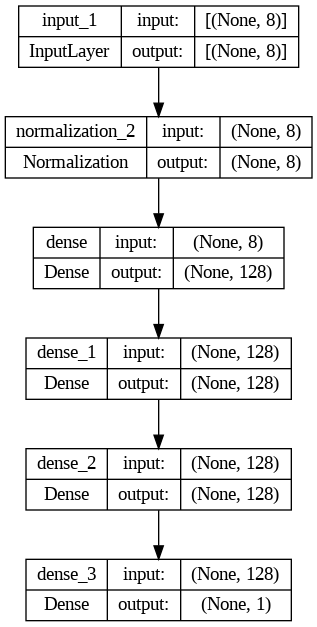

In [65]:
tf.keras.utils.plot_model(model=model, to_file="model.png", show_shapes=True)